<h1>SUBSET SELECTION</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
import xlrd
import time
import statsmodels.api as sm

In [5]:
data=pd.read_excel('Data/Mini Project EFSA.xlsx')
data.rename(columns={'sex \n(0=M, 1=F)':'sex'}, inplace=True)
data

,response,number of animals,SD,dose,sex,endpoint
0,570.4,9,75.6,0,0,1
1,548.5,10,44.3,30,0,1
2,533.0,10,72.3,100,0,1
3,488.1,9,42.5,150,0,1
4,329.8,10,46.8,0,1,1
5,319.7,10,24.3,30,1,1
6,293.3,10,20.1,100,1,1
7,312.4,10,43.1,150,1,1
8,45.2,9,1.5,0,0,2
9,44.6,10,1.7,30,0,2


In [6]:
import funzioni

In [7]:
del funzioni
import funzioni

<h2>I dati sono le colonne originali</h2>

In [8]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

#Prepare the datas
y = data.response
weights = data.SD
X = data.drop(columns=["response","SD"])

#Devo estrarre l'endpoint dalla matrice in modo da avere 2 variabili categoriche usate per fare i 3 endpoint
endpoint1 = X['endpoint'] == 1
endpoint2 = X['endpoint'] == 2
X["endpoint1"] = endpoint1.astype("int")
X["endpoint2"] = endpoint2.astype("int")
X = X.drop(columns=["endpoint"])
#X["ones"] = np.ones((X.shape[0],1)) 

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [9]:
 X

,1,number of animals,dose,sex,endpoint1,endpoint2,number of animals^2,number of animals dose,number of animals sex,number of animals endpoint1,...,dose^2,dose sex,dose endpoint1,dose endpoint2,sex^2,sex endpoint1,sex endpoint2,endpoint1^2,endpoint1 endpoint2,endpoint2^2
0,1.0,9.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,10.0,30.0,0.0,1.0,0.0,100.0,300.0,0.0,10.0,...,900.0,0.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,10.0,100.0,0.0,1.0,0.0,100.0,1000.0,0.0,10.0,...,10000.0,0.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,9.0,150.0,0.0,1.0,0.0,81.0,1350.0,0.0,9.0,...,22500.0,0.0,150.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,10.0,0.0,1.0,1.0,0.0,100.0,0.0,10.0,10.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
5,1.0,10.0,30.0,1.0,1.0,0.0,100.0,300.0,10.0,10.0,...,900.0,30.0,30.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6,1.0,10.0,100.0,1.0,1.0,0.0,100.0,1000.0,10.0,10.0,...,10000.0,100.0,100.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7,1.0,10.0,150.0,1.0,1.0,0.0,100.0,1500.0,10.0,10.0,...,22500.0,150.0,150.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8,1.0,9.0,0.0,0.0,0.0,1.0,81.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1.0,10.0,30.0,0.0,0.0,1.0,100.0,300.0,0.0,0.0,...,900.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0


<h1>2 - Use subset selection to estimate separate models for the 3 endpoints using gender as categorical variable.</h1>

<h1>3 - Use subset selection to estimate a unique model using gender and endpoint as categorical variables</h1>
<h2>Forward solo con i predittori lineari</h2>

In [10]:
from funzioni import *

In [11]:
models_fwd = pd.DataFrame(columns=["RSS", "model","number_of_predictors"])

tic = time.time()
predictors = []

#for i in range(1,len(X.columns)+1):
#    models_fwd.loc[i] = forward(y,X,predictors,weights,yesPrint=False)
#    predictors = models_fwd.loc[i]["model"].model.exog_names
models_fwd = mainForward(X,y,weights)


toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  21 models on 1 predictors in 0.15558481216430664 seconds.
Processed  20 models on 2 predictors in 0.11420845985412598 seconds.
Processed  19 models on 3 predictors in 0.15259146690368652 seconds.
Processed  18 models on 4 predictors in 0.08677864074707031 seconds.
Processed  17 models on 5 predictors in 0.10372304916381836 seconds.
Processed  16 models on 6 predictors in 0.10372018814086914 seconds.
Processed  15 models on 7 predictors in 0.11568880081176758 seconds.
Processed  14 models on 8 predictors in 0.08976078033447266 seconds.
Processed  13 models on 9 predictors in 0.07181048393249512 seconds.
Processed  12 models on 10 predictors in 0.1156911849975586 seconds.
Processed  11 models on 11 predictors in 0.06540203094482422 seconds.
Processed  10 models on 12 predictors in 0.07679247856140137 seconds.
Processed  9 models on 13 predictors in 0.06682276725769043 seconds.
Processed  8 models on 14 predictors in 0.05784416198730469 seconds.
Processed  7 models on 15 predic

In [12]:
display(models_fwd)

,RSS,model,number_of_predictors,name_of_predictors,Y_pred
1,119900.270000,<statsmodels.regression.linear_model.Regressio...,1,[endpoint1],0 424.4 1 424.4 2 424.4 3 424....
2,22041.390000,<statsmodels.regression.linear_model.Regressio...,2,"[endpoint1, sex endpoint1]",0 535.0 1 535.0 2 535.0 3 535....
3,6903.390000,<statsmodels.regression.linear_model.Regressio...,3,"[endpoint1, sex endpoint1, endpoint2]",0 535.0 1 535.0 2 535.0 3 535....
4,4025.072283,<statsmodels.regression.linear_model.Regressio...,4,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 557.605435 1 547.917391 2 525.31...
5,1477.124865,<statsmodels.regression.linear_model.Regressio...,5,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 556.646329 1 548.803737 2 526.24...
6,1423.460728,<statsmodels.regression.linear_model.Regressio...,6,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 557.821930 1 549.381565 2 525.70...
7,1354.319005,<statsmodels.regression.linear_model.Regressio...,7,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 558.424397 1 549.891855 2 525.50...
8,1198.773001,<statsmodels.regression.linear_model.Regressio...,8,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 560.276531 1 551.319149 2 524.84...
9,1145.969270,<statsmodels.regression.linear_model.Regressio...,9,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 561.691080 1 550.421916 2 522.96...
10,1018.757897,<statsmodels.regression.linear_model.Regressio...,10,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 561.026826 1 549.341460 2 527.30...


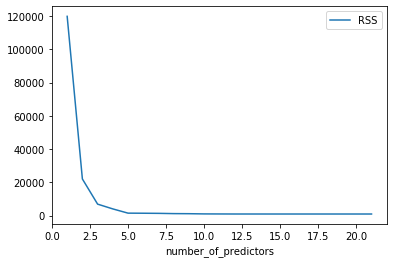

In [13]:
models_fwd.plot(x='number_of_predictors', y='RSS')

In [14]:
 for i in range(0,models_fwd.shape[0]):
    print(models_fwd.iloc[i]["model"].model.exog_names)
    print()


['endpoint1']

['endpoint1', 'sex endpoint1']

['endpoint1', 'sex endpoint1', 'endpoint2']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose', 'number of animals sex']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose', 'number of animals sex', 'dose^2']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose', 'number of animals sex', 'dose^2', 'number of animals dose']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose', 'number of animals sex', 

In [15]:
res = models_fwd.iloc[5]["model"].model.fit()

In [7]: print(res.summary())

                                 WLS Regression Results                                
Dep. Variable:               response   R-squared (uncentered):                   0.999
Model:                            WLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              3286.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):                    2.40e-26
Time:                        17:42:07   Log-Likelihood:                         -83.048
No. Observations:                  24   AIC:                                      178.1
Df Residuals:                      18   BIC:                                      185.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

<h2>Confrontiamo ora questi modelli con criteri oggettivi</h2>

In [16]:
for i in range(1, models_fwd.shape[0]):
    model = models_fwd.loc[i,"model"]
    models_fwd.loc[i,"aic"] = model.aic
    models_fwd.loc[i,"bic"] = model.bic
    models_fwd.loc[i,"mse"] = model.mse_total
    models_fwd.loc[i,"adj_rsquare"] = model.rsquared_adj
    

In [17]:
models_fwd

,RSS,model,number_of_predictors,name_of_predictors,Y_pred,aic,bic,mse,adj_rsquare
1,119900.270000,<statsmodels.regression.linear_model.Regressio...,1,[endpoint1],0 424.4 1 424.4 2 424.4 3 424....,274.501732,275.679786,65034.297917,0.919841
2,22041.390000,<statsmodels.regression.linear_model.Regressio...,2,"[endpoint1, sex endpoint1]",0 535.0 1 535.0 2 535.0 3 535....,235.852014,238.208121,65034.297917,0.984595
3,6903.390000,<statsmodels.regression.linear_model.Regressio...,3,"[endpoint1, sex endpoint1, endpoint2]",0 535.0 1 535.0 2 535.0 3 535....,209.990187,213.524348,65034.297917,0.994945
4,4025.072283,<statsmodels.regression.linear_model.Regressio...,4,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 557.605435 1 547.917391 2 525.31...,199.042913,203.755129,65034.297917,0.996905
5,1477.124865,<statsmodels.regression.linear_model.Regressio...,5,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 556.646329 1 548.803737 2 526.24...,176.984225,182.874494,65034.297917,0.998805
6,1423.460728,<statsmodels.regression.linear_model.Regressio...,6,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 557.821930 1 549.381565 2 525.70...,178.096069,185.164392,65034.297917,0.998784
7,1354.319005,<statsmodels.regression.linear_model.Regressio...,7,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 558.424397 1 549.891855 2 525.50...,178.901054,187.147431,65034.297917,0.998775
8,1198.773001,<statsmodels.regression.linear_model.Regressio...,8,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 560.276531 1 551.319149 2 524.84...,177.973049,187.397480,65034.297917,0.998848
9,1145.969270,<statsmodels.regression.linear_model.Regressio...,9,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 561.691080 1 550.421916 2 522.96...,178.891904,189.494388,65034.297917,0.998825
10,1018.757897,<statsmodels.regression.linear_model.Regressio...,10,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 561.026826 1 549.341460 2 527.30...,178.067904,189.848442,65034.297917,0.998881


In [18]:
dict_results_best_models = {}

#Quelli da minimizzare
for criteria in ["bic","aic"]:
    print("The criteria is: " + criteria)
    row = models_fwd.loc[models_fwd[criteria].argmin()]
    modelFeatures = row["model"].model.exog_names
    if "intercept" not in modelFeatures:
        modelFeatures.append("intercept")
    criteriaValue = row[criteria]
    degressOfFreedom = row["model"].model.df_model
    print("Features: "+str(modelFeatures))
    print("Criteria value: "+str(criteriaValue))
    print("Degrees of freedom: "+str(degressOfFreedom+1))
    print()
    dict_results_best_models[criteria] = row
    
    
#Quelli da massimizzare
for criteria in ["adj_rsquare"]:
    print("The criteria is: " + criteria)
    row = models_fwd.loc[models_fwd[criteria].argmax()]
    modelFeatures = row["model"].model.exog_names
    if "intercept" not in modelFeatures:
        modelFeatures.append("intercept")
    criteriaValue = row[criteria]
    degressOfFreedom = row["model"].model.df_model
    print("Features: "+str(modelFeatures))
    print("Criteria value: "+str(criteriaValue))
    print("Degrees of freedom: "+str(degressOfFreedom+1))
    print()
    dict_results_best_models[criteria] = row
    

The criteria is: bic
Features: ['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'intercept']
Criteria value: 203.75512854134968
Degrees of freedom: 5.0

The criteria is: aic
Features: ['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'intercept']
Criteria value: 199.04291321995788
Degrees of freedom: 5.0

The criteria is: adj_rsquare
Features: ['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose', 'number of animals sex', 'dose^2', 'intercept']
Criteria value: 0.998825266762616
Degrees of freedom: 10.0



In [19]:
from funzioni import CarloCrecco 
CarloCrecco()

Cuindknpjbjfenjja!


In [20]:
best_models = pd.DataFrame(dict_results_best_models).T
best_models
import pickle
best_models.to_pickle("best_model_for_criteria.pkl")

In [21]:
best_models = pd.read_pickle("best_model_for_criteria.pkl")
best_models


,RSS,model,number_of_predictors,name_of_predictors,Y_pred,aic,bic,mse,adj_rsquare
bic,4025.07,<statsmodels.regression.linear_model.Regressio...,4,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 557.605435 1 547.917391 2 525.31...,199.043,203.755,65034.3,0.996905
aic,4025.07,<statsmodels.regression.linear_model.Regressio...,4,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 557.605435 1 547.917391 2 525.31...,199.043,203.755,65034.3,0.996905
adj_rsquare,1145.97,<statsmodels.regression.linear_model.Regressio...,9,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 561.691080 1 550.421916 2 522.96...,178.892,189.494,65034.3,0.998825


<h1>Grafici confronto risposta predizione</h1>

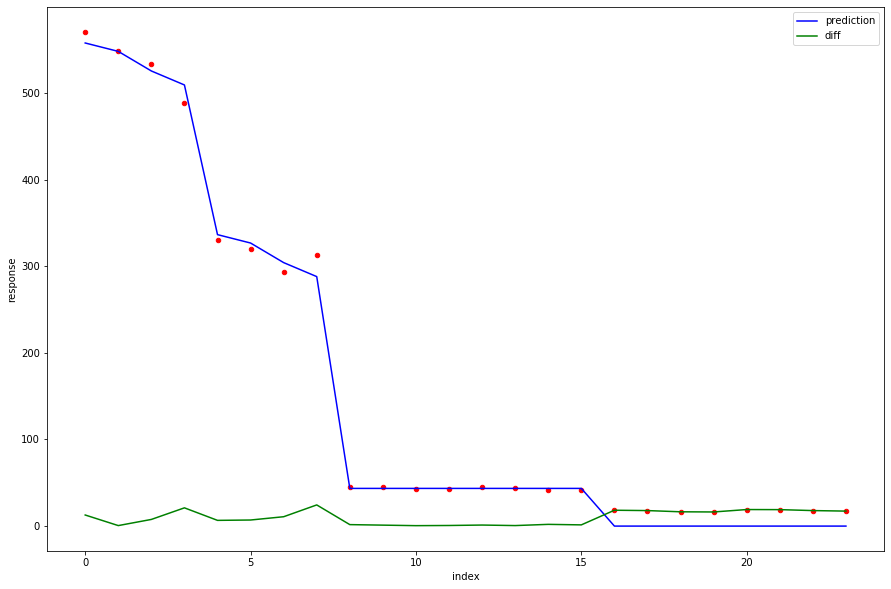

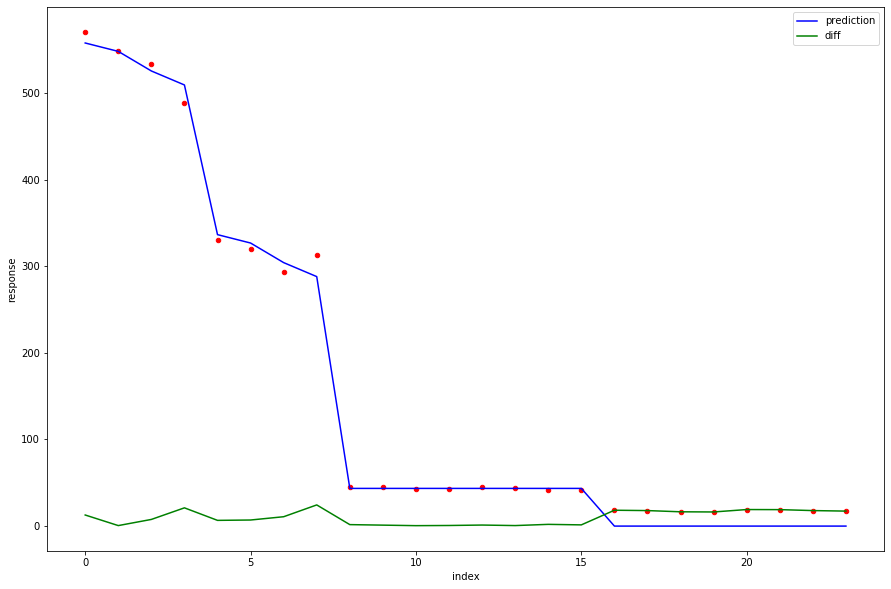

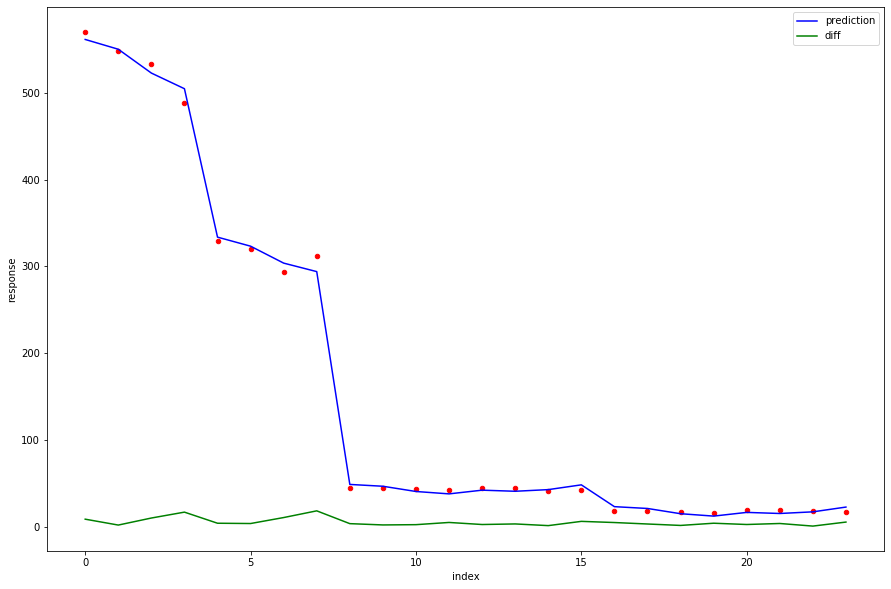

In [22]:
from funzioni import *
for i in range(0,len(best_models)):
    y_hat = best_models["Y_pred"][i]
    plot_response_over_prediction(y, y_hat)